In [17]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from tradingcore.execution_manager import ExecutionManager
from tradingcore.campaign import Campaign
from tradingcore.account import Account
from tradingcore.moneymanagement import PlainMM

from exobuilder.data.datasource_mongo import DataSourceMongo
from exobuilder.data.datasource_sql import DataSourceSQL
from exobuilder.data.assetindex_mongo import AssetIndexMongo
from exobuilder.data.exostorage import EXOStorage

import pprint

In [19]:
try:
    from .settings import *
except SystemError:
    from scripts.settings import *

try:
    from .settings_local import *
except SystemError:
    try:
        from scripts.settings_local import *
    except ImportError:
        pass
    pass

In [20]:
assetindex = AssetIndexMongo(MONGO_CONNSTR, MONGO_EXO_DB)
storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
#datasource = DataSourceSQL(SQL_HOST, SQL_USER, SQL_PASS, assetindex, futures_limit=10, options_limit=10)
datasource = DataSourceMongo(MONGO_CONNSTR, MONGO_EXO_DB, assetindex, futures_limit=10, options_limit=10, exostorage=storage)


In [21]:
exmgr = ExecutionManager(MONGO_CONNSTR, datasource, dbname=MONGO_EXO_DB)

In [22]:
campaigns = exmgr.campaign_load_all()
accounts = exmgr.account_load_all()
pp = pprint.PrettyPrinter(indent=4)

## List of available campaigns

In [23]:
[print(x) for x in campaigns.keys()];

test_campaign
ZS_Bull
ZS_Bear
CL_Bullish
NG_Bear
ES_Bear
ZN_Bull
NG_Bull
CL_Bull
CL_Bidirectional
CL_Sample
ZC_Bear
ES_Bull
ZW_Bear
ZW_Bull
CL_Bear
ZN_Bear


In [24]:
swm_info = storage.swarms_info()
pp.pprint(swm_info)

{   '_id': None,
    'alphas': [   'BollingerBands',
                  'RenkoPatternsNoExits',
                  'SwingPoint',
                  'EXO',
                  'PointAndFigure',
                  'IchimokuCloud',
                  'MACross',
                  'BolllingerBands'],
    'exo_types': [   'SMART',
                     'SmartEXO',
                     'CallSpread',
                     'PutSpread',
                     'ContFut',
                     'BullishCollarBW',
                     'BearishCollarBW'],
    'instruments': ['ZC', 'NG', 'ZN', 'ES', 'ZS', 'CL', 'ZW']}


# Alphas list

In [27]:
instruments_filter = ['CL']  # Select ALL
#instruments_filter = ['ES', 'CL']

exo_filter = ['*'] # Select ALL
#exo_filter = ['BullishCollar']

direction_filter = [0, -1, 1] # Select ALL
#direction_filter = [1]

alpha_filter = ['']  # Select ALL
#alpha_filter = ['MaCross', 'PointAndFigurePatterns']

swmdf, swm_data = storage.swarms_list(instruments_filter, direction_filter, alpha_filter, exo_filter)

[print(s) for s in sorted(swmdf.columns)];

CL_BearishCollarBW_Long_EXO
CL_BearishCollarBW_Long_PointAndFigure
CL_BearishCollarBW_Long_PointAndFigure_largebox-bearish-sample-custom
CL_BearishCollarBW_Long_PointAndFigure_smallbox-bearish-sample-custom
CL_BearishCollarBW_Short_EXO
CL_BearishCollarBW_Short_SwingPoint
CL_BearishCollarBW_Short_SwingPoint_bearish-sample-custom
CL_BearishCollarBW_Short_SwingPoint_bullish-sample-custom
CL_BullishCollarBW_Long_EXO
CL_BullishCollarBW_Short_EXO
CL_CallSpread_Long_EXO
CL_CallSpread_Long_PointAndFigure
CL_CallSpread_Long_PointAndFigure_largebox-bearish-custom
CL_CallSpread_Long_PointAndFigure_smallbox-bearish-custom
CL_CallSpread_Short_EXO
CL_CallSpread_Short_SwingPoint
CL_CallSpread_Short_SwingPoint_bearish-custom
CL_CallSpread_Short_SwingPoint_bullish-custom
CL_ContFut_Long_EXO
CL_ContFut_Short_EXO
CL_PutSpread_Long_BollingerBands_bullish-custom
CL_PutSpread_Long_BolllingerBands
CL_PutSpread_Long_BolllingerBands_bullish-custom
CL_PutSpread_Long_EXO
CL_PutSpread_Long_IchimokuCloud
CL_PutSpr

In [35]:
passive_exo = {}

exo_filter = '*'     # All 
#exo_filter = 'ES_'  # ES only
exo_filter = 'ES*Collar'  # ES Collars (incl Bearish, Bullish, BW and vanilla)


print('==== Passive EXO list')
for exo_name in storage.exo_list(exo_filter):
    passive_exo[exo_name], exo_dict = storage.load_series(exo_name)

for exo in sorted(passive_exo.keys()):
    print(exo)
    
print('==== Alphas EXO list')
[print(s) for s in sorted(swmdf.columns)];

==== Passive EXO list
ES_BearishCollarBW
ES_BullishCollarBW
==== Alphas EXO list
CL_BearishCollarBW_Long_EXO
CL_BearishCollarBW_Long_PointAndFigure
CL_BearishCollarBW_Long_PointAndFigure_largebox-bearish-sample-custom
CL_BearishCollarBW_Long_PointAndFigure_smallbox-bearish-sample-custom
CL_BearishCollarBW_Short_EXO
CL_BearishCollarBW_Short_SwingPoint
CL_BearishCollarBW_Short_SwingPoint_bearish-sample-custom
CL_BearishCollarBW_Short_SwingPoint_bullish-sample-custom
CL_BullishCollarBW_Long_EXO
CL_BullishCollarBW_Short_EXO
CL_CallSpread_Long_EXO
CL_CallSpread_Long_PointAndFigure
CL_CallSpread_Long_PointAndFigure_largebox-bearish-custom
CL_CallSpread_Long_PointAndFigure_smallbox-bearish-custom
CL_CallSpread_Short_EXO
CL_CallSpread_Short_SwingPoint
CL_CallSpread_Short_SwingPoint_bearish-custom
CL_CallSpread_Short_SwingPoint_bullish-custom
CL_ContFut_Long_EXO
CL_ContFut_Short_EXO
CL_PutSpread_Long_BolllingerBands
CL_PutSpread_Long_BolllingerBands_bullish-custom
CL_PutSpread_Long_EXO
CL_PutSp

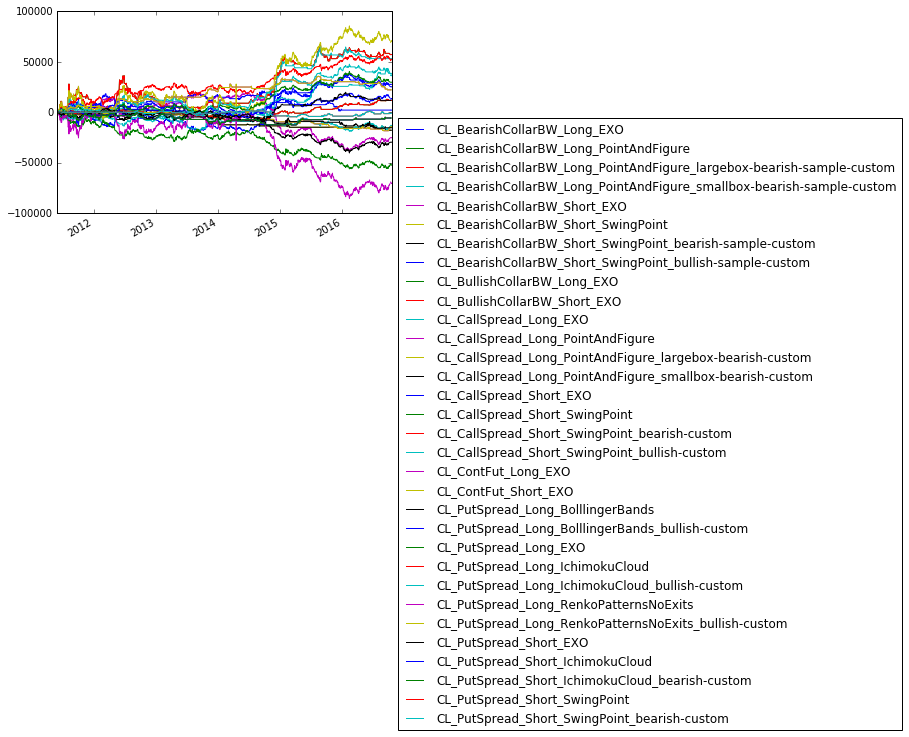

In [36]:
swmdf.plot().legend(loc='best', bbox_to_anchor=(1, 0.5));

# Campaign composition

In [37]:
 campaign_dict = {
            'name': 'CL_Bear',
            'description': 'Bearish Expression of Crude Oil',
            'alphas': {
                'CL_CallSpread_Long_PointAndFigurePatterns_largebox-bearish-custom': {
                    'qty': 1.0,
                },
             'CL_CallSpread_Long_PointAndFigurePatterns_smallbox-bearish-custom': {
                    'qty': 1.0,
                },
             'CL_CallSpread_Short_SwingPoint_bearish-custom': {
                    'qty': 1.0,
                },
             'CL_PutSpread_Short_IchimokuCloud_bearish-custom': {
                    'qty': 1.0,
                },
             'CL_PutSpread_Short_SwingPoint_bearish-custom': {
                    'qty': 1.0,
                },
            'CL_PutSpread_Long_EXO': {
                    'qty': 1.0,
                },
            
            }
        }

In [38]:
cmp = Campaign(campaign_dict, datasource)

### Save campaign

In [39]:
exmgr.campaign_save(cmp)

## Campaign positions

### Alphas positions

In [40]:
pp.pprint(cmp.alphas_positions)

{   'CL_CallSpread_Short_SwingPoint_bearish-custom': {   'exo_name': 'CL_CallSpread',
                                                         'exposure': 0.0,
                                                         'prev_exposure': 0.0},
    'CL_PutSpread_Long_EXO': {   'exo_name': 'CL_PutSpread',
                                 'exposure': 1.0,
                                 'prev_exposure': 1.0},
    'CL_PutSpread_Short_IchimokuCloud_bearish-custom': {   'exo_name': 'CL_PutSpread',
                                                           'exposure': 0.0,
                                                           'prev_exposure': 0.0},
    'CL_PutSpread_Short_SwingPoint_bearish-custom': {   'exo_name': 'CL_PutSpread',
                                                        'exposure': -1.0,
                                                        'prev_exposure': -1.0}}


### EXO net positions

In [41]:
pp.pprint(cmp.exo_positions)

{   'CL_CallSpread': {'exposure': 0.0, 'prev_exposure': 0.0},
    'CL_PutSpread': {'exposure': 0.0, 'prev_exposure': 0.0}}


### Contracts positions

In [42]:
pp.pprint(cmp.positions)

{   'C_US_CLEZ164950': {   'asset': {   '_id': ObjectId('57aae75034ac2255e5903a23'),
                                        '_type': 'opt',
                                        'callorput': 'C',
                                        'cqgsymbol': 'C.US.CLEZ164950',
                                        'expirationdate': datetime.datetime(2016, 11, 16, 0, 0),
                                        'idcontract': 393,
                                        'idinstrument': 21,
                                        'idoption': 3178810,
                                        'name': 'C.US.CLEZ164950',
                                        'optionmonth': 'Z',
                                        'optionmonthint': 12,
                                        'optionname': 'C.US.CLEZ164950',
                                        'optionyear': 2016,
                                        'strikeprice': 49.5},
                           'prev_qty': 0.0,
                        